In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier,GradientBoostingRegressor,AdaBoostRegressor

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import f1_score

from sklearn.metrics import classification_report, confusion_matrix

import warnings

import pickle

from scipy import stats

warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')



In [ ]:
data=pd.read_csv('/content/sample_data/Data_Train(1).csv')

In [ ]:
data.head()

In [ ]:
for i in category:
  print(i, data[i].unique())

In [ ]:
#we now split the Date column to extract the 'Date','Month',and'Year' values,and store them in new columns in our dataframe.
data.Date_of_Journey=data.Date_of_Journey.str.split('/')


In [ ]:
data.Date_of_Journey

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [ ]:
data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]

In [ ]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
data.Route=data.Route.str.split('->')
data.Route

0                    [BLR → DEL]
1        [CCU → IXR → BBI → BLR]
2        [DEL → LKO → BOM → COK]
3              [CCU → NAG → BLR]
4              [BLR → NAG → DEL]
                  ...           
10678                [CCU → BLR]
10679                [CCU → BLR]
10680                [BLR → DEL]
10681                [BLR → DEL]
10682    [DEL → GOI → BOM → COK]
Name: Route, Length: 10683, dtype: object

In [ ]:
data['City1']=data.Route.str[0]

data['City2']=data.Route.str[1]

data['City3']=data.Route.str[2]

data['City4']=data.Route.str[3]

data['City']=data.Route.str[4]

data['City6']=data.Route.str[5]

In [ ]:
data.Dep_Time=data.Dep_Time.str.split(':')

In [ ]:
data['Dep_Time_Hour' ]=data.Dep_Time.str[0] 
data['Dep_Time_Mins' ]=data.Dep_Time.str[1]

In [ ]:
data. Arrival_Time=data. Arrival_Time.str.split(' ')

In [ ]:
data['Arrival_date']=data. Arrival_Time.str[1]
data['Time_of_Arrival' ]=data. Arrival_Time.str[0]

In [ ]:
data['Time_of_Arrival' ]=data. Time_of_Arrival.str.split(':')

In [ ]:
data['Arrival_Time_Hour' ]=data. Time_of_Arrival.str[0]

data['Arrival_Time_Mins' ]=data.Time_of_Arrival.str[1]

In [ ]:
data.Duration=data.Duration. str.split(' ')

In [ ]:
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h') 
data['Travel Hours']=data['Travel_Hours'].str[0]
data. Travel_Hours=data. Travel_Hours
data['Travel_Mins ']=data.Duration.str[1]

data.Travel_Mins=data.Travel_Mins.str.split('m')
data.Travel_Mins=data.Travel_Mins.str[0]

In [ ]:
data.Total_Stops.replace('non_stop',0, inplace=True) 
data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]

In [ ]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
data.Additional_Info.replace('No Info','No Info',inplace=True)

In [ ]:
data.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                10683
City3                10683
City4                10683
City                 10683
City6                10683
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date          6348
Time_of_Arrival          0
Arrival_Time_Hour        0
Arrival_Time_Mins        0
Travel_Hours             0
Travel Hours             0
Travel_Mins           1032
dtype: int64

In [ ]:
data.drop(["City1","City2","City3","City4", "city", "city6"],axis=1,inplace=True
data.drop(["Dte_of_Journey","Route","Total_Stops","Arrival_Time","Travel_Mins"],axis=1,inplace=True)

In [ ]:
data['Date_of_Journey']fillna(data['Date']inplace=True)

In [ ]:
data['City1'].fillna('None', inplace=True)

In [ ]:
data['City2'].fillna('None', inplace=True)

In [ ]:
data['City3'].fillna('None', inplace=True)

In [ ]:
data['City4'].fillna('None', inplace=True)

In [ ]:
data['City'].fillna('None', inplace=True)

In [ ]:
data['City6'].fillna('None', inplace=True)

In [ ]:
data['Arrival_date'].fillna(data['Date'],inplace=True)

In [ ]:
data['Travel Mins'].fillna(0,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Date_of_Journey    10683 non-null  object
 2   Source             10683 non-null  object
 3   Destination        10683 non-null  object
 4   Route              10682 non-null  object
 5   Dep_Time           10683 non-null  object
 6   Arrival_Time       10683 non-null  object
 7   Duration           10683 non-null  object
 8   Total_Stops        10682 non-null  object
 9   Additional_Info    10683 non-null  object
 10  Price              10683 non-null  int64 
 11  Date               10683 non-null  object
 12  Month              10683 non-null  object
 13  Year               10683 non-null  object
 14  City1              10683 non-null  object
 15  City2              10683 non-null  object
 16  City3              10683 non-null  objec

In [ ]:
data.Date=data.Date.astype('int64')
data.Month=data.Month.astype('int64')
data.Year=data.Year.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64') 
data.Dep_Time_Mins=data.Dep_Time_Mins.astype('int64')
data.Arrival_date=data.Arrival_date.astype("int64")
data. Arrival_Time_Hour=data. Arrival_Time_Hour.astype('int64') 
data.Arrival_Time_Mins=data. Arrival_Time_Mins.astype('int64')  
data.Travel_Mins=data.Travel_Mins.astype('int64')

In [ ]:
data[data['Travel_Hours']=='5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City6,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Time_of_Arrival,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel Hours,Travel_Mins


In [ ]:
data.drop(index=6474,inplace=True,axis=0)

In [ ]:
data.Travel_Hours=data.Travel_Hours.astype('int64')

In [ ]:
categorical=['Airline', 'Source','Destination', 'Additional_Info','City']

numerical=['Total_Stops', 'Date', 'Month', 'Year', 'Dep_Time_Hour', 'Dep_Time_ Mins', 'Arrival_date', 'Arrival_Time_Hour', 'Arrival_Time_Mins', 'Travel_Hours', 'Travel_Mins']

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [ ]:
data.Airline=le.fit_transform(data.Airline)

data.Source=le.fit_transform(data.Source)

data.Destination=le.fit_transform(data. Destination)

data.Total_Stops=le.fit_transform(data. Total_Stops)

data.City1=le.fit_transform(data.City1)

data.City2=le.fit_transform(data.City2) 

data.City3=le.fit_transform(data.City3)

data.Additional_Info=le.fit_transform(data. Additional_Info)

data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City6,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Time_of_Arrival,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel Hours,Travel_Mins
0,3,24/03/2019,0,5,[BLR → DEL],"[22, 20]","[01:10, 22, Mar]","[2h, 50m]",4,8,...,None,22,20,22,"[01, 10]",01,10,"[2, ]",2,50m
1,1,1/05/2019,3,0,[CCU → IXR → BBI → BLR],"[05, 50]",[13:15],"[7h, 25m]",1,8,...,None,05,50,1,"[13, 15]",13,15,"[7, ]",7,25m
2,4,9/06/2019,2,1,[DEL → LKO → BOM → COK],"[09, 25]","[04:25, 10, Jun]",[19h],1,8,...,None,09,25,10,"[04, 25]",04,25,"[19, ]",19,NaN
3,3,12/05/2019,3,0,[CCU → NAG → BLR],"[18, 05]",[23:30],"[5h, 25m]",0,8,...,None,18,05,1,"[23, 30]",23,30,"[5, ]",5,25m
4,3,01/03/2019,0,5,[BLR → NAG → DEL],"[16, 50]",[21:35],"[4h, 45m]",0,8,...,None,16,50,0,"[21, 35]",21,35,"[4, ]",4,45m


In [ ]:
data=data(['Airline', 'Source', 'Destination', 'Date', 'Month', 'Year', 'Dep_Time_Hour', 'Dep_Time_Mins', 'Arrival_date', 'Arrival_Time_Hour','Arrival_Time_Mins','Travel_Hours','Travel_Mins'])

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City6,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Time_of_Arrival,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel Hours,Travel_Mins
0,3,24/03/2019,0,5,[BLR → DEL],"[22, 20]","[01:10, 22, Mar]","[2h, 50m]",4,8,...,None,22,20,22,"[01, 10]",01,10,"[2, ]",2,50m
1,1,1/05/2019,3,0,[CCU → IXR → BBI → BLR],"[05, 50]",[13:15],"[7h, 25m]",1,8,...,None,05,50,1,"[13, 15]",13,15,"[7, ]",7,25m
2,4,9/06/2019,2,1,[DEL → LKO → BOM → COK],"[09, 25]","[04:25, 10, Jun]",[19h],1,8,...,None,09,25,10,"[04, 25]",04,25,"[19, ]",19,NaN
3,3,12/05/2019,3,0,[CCU → NAG → BLR],"[18, 05]",[23:30],"[5h, 25m]",0,8,...,None,18,05,1,"[23, 30]",23,30,"[5, ]",5,25m
4,3,01/03/2019,0,5,[BLR → NAG → DEL],"[16, 50]",[21:35],"[4h, 45m]",0,8,...,None,16,50,0,"[21, 35]",21,35,"[4, ]",4,45m


In [ ]:
data.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,City1,City2,City3
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.0
mean,3.966205,1.952069,1.435967,1.458622,7.392998,9086.292735,2.941678,74.827748,0.0,0.0
std,2.352090,1.177110,1.474773,1.806640,1.214254,4610.885695,2.732095,36.731657,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,0.000000,0.000000,0.0,0.0
25%,3.000000,2.000000,0.000000,0.000000,8.000000,5277.000000,1.000000,48.000000,0.0,0.0
50%,4.000000,2.000000,1.000000,0.000000,8.000000,8372.000000,2.000000,73.000000,0.0,0.0
75%,4.000000,3.000000,2.000000,4.000000,8.000000,12373.000000,3.000000,104.000000,0.0,0.0
max,11.000000,4.000000,5.000000,5.000000,9.000000,79512.000000,9.000000,128.000000,0.0,0.0


In [ ]:
import seaborn as sns 
C=1 
plt.figure(figsize=(20,45))
for i in categorical:
  plt.subplot(6,3,C)
  sns.countplot(data[i])
  plt.xticks(rotation=90)
  plt.tight_layout(pad=3.0)
  C=C+1
plt.show()

<Figure size 1500x800 with 0 Axes>

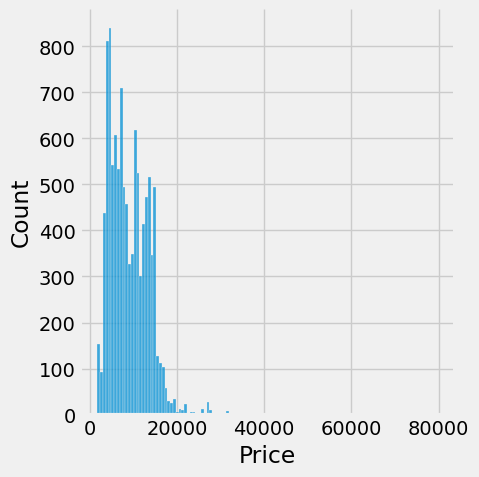

In [ ]:
plt.figure(figsize=(15,8))
sns.displot(data.Price)

<Axes: >

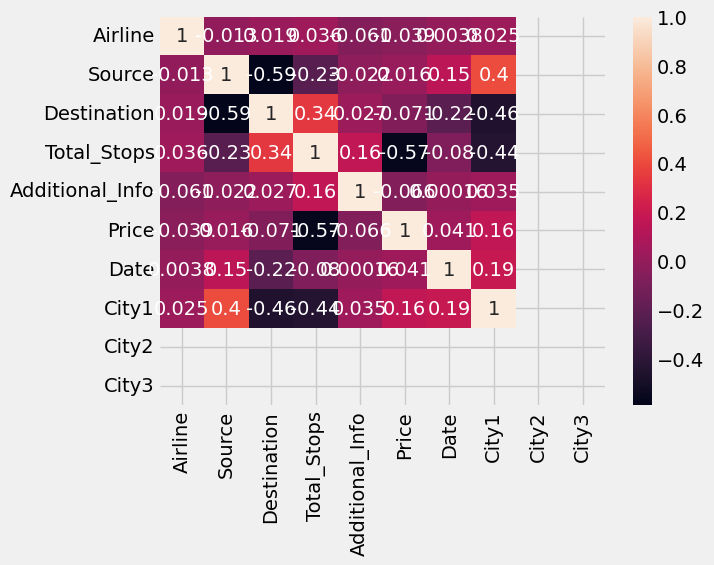

In [ ]:
sns.heatmap(data.corr(),annot=True)

<Axes: >

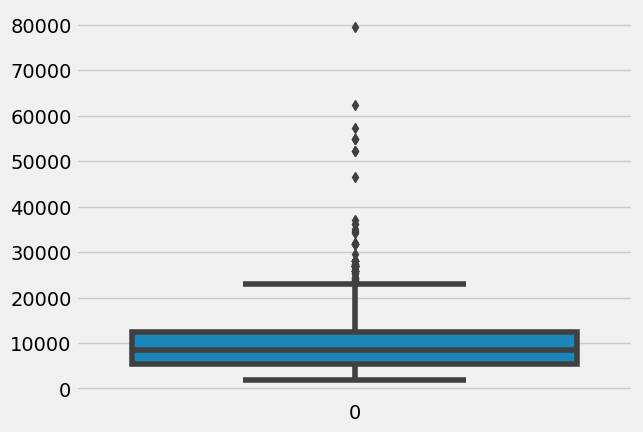

In [ ]:
 import seaborn as sns
sns.boxplot(data['Price'])

In [ ]:
y = data['Price']
X = data.drop(columns=['Price'], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler 
ss=StandardScaler()


In [ ]:
X_scaled = ss.fit_transform(X)

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

In [ ]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City6,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Time_of_Arrival,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel Hours,Travel_Mins
10005,6,27/05/2019,2,1,[DEL → BOM → COK],"[08, 30]",[19:15],"[10h, 45m]",0,8,...,None,08,30,2,"[19, 15]",19,15,"[10, ]",10,45m
3684,4,9/05/2019,2,1,[DEL → BOM → COK],"[11, 30]","[12:35, 10, May]","[25h, 5m]",0,5,...,None,11,30,10,"[12, 35]",12,35,"[25, ]",25,5m
1034,8,24/04/2019,2,1,[DEL → MAA → COK],"[15, 45]",[22:05],"[6h, 20m]",0,8,...,None,15,45,2,"[22, 05]",22,05,"[6, ]",6,20m
3909,6,21/03/2019,2,1,[DEL → BOM → COK],"[12, 50]","[01:35, 22, Mar]","[12h, 45m]",0,8,...,None,12,50,22,"[01, 35]",01,35,"[12, ]",12,45m
3088,1,24/06/2019,2,1,[DEL → HYD → BOM → COK],"[17, 15]","[19:15, 25, Jun]",[26h],1,8,...,None,17,15,25,"[19, 15]",19,15,"[26, ]",26,NaN


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

rfr=RandomForestRegressor()

gb=GradientBoostingRegressor()

ad=AdaBoostRegressor()

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
for i in [rfr,gb,ad]:
    i.fit(X_train,y_train) 
    y_pred-i.predict(X_test)
    test_score=r2_score (y_test,y_pred)
    train_score=r2_score (y_train, i.predict(X_train))
    if abs(train_score=test_score)<=0.2:
       print(i)
       print("R2 score is", r2_score (y_test,y_pred))
       print("R2 for train data", r2_score (y_train, i.predict(X_train)))
       print("Mean Absolute Error is", mean_absolute_error(y_pred,y_test))
       print("Mean Squared Error is",(mean_squared_error(y_pred, y_test))
       print("Root Mean Sqaured Error is",(mean_squared_error(y_pred,y_test,squared=False)))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
knn=KNeighborsRegressor()
svr=SVR()
dt=DecisionTreeRegressor()
for i in [knn, svr,dt]:
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  test_score=r2_score (y_test,y_pred) 
  train_score=r2_score (y_train, i.predict(X_train))
  if abs(train_score=test_score)<=0.1:
     print(i)
     print('R2 Score is', r2_score(y_test,y_pred))
     print('R2 Score for train data', r2_score (y_train,i.predict(X_train)))
     print('Mean Absolute Error is', mean_absolute_error(y_test,y_pred))
     print('Mean Squared Error is',mean_squared_error(y_test,y_pred)) 
     print('Root Mean Squared Error is', (mean_squared_error(y_test,y_pred, squared=False)))

ValueError: ignored

In [ ]:
from sklearn.model_selection import cross_val_score 
for i in range(2,5): 
  cv=cross_val_score(rfr,X,y,cv=i) 
  print (rfr,cv.mean())

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid={'n_estimators': [10,38,50,70,100],'max depth': [None,1,2,3],'max_features':['auto', 'sqrt']}

rfr=RandomForestRegressor()

rf_res=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,cv=3, verbose=2,n_jobs=-1)

rf_res.fit(X_train,y_train)

In [ ]:
gb=GradientBoostingRegressor()

gb_res=RandomizedSearchCV(estimator=gb,param_distributions=param_grid, cv=3,verbose=2,n_jobs=-1)

gb_res.fit(X_train,y_train)

In [ ]:
rfr=RandomForestRegressor(n_estimators=10, max_features='sqrt',max_depth=None)

rfr.fit(x_train,y_train)

y_train_pred=rfr.predict(x_train)
 
y_test_pred=rfr.predict(x_test)

print("train accuracy", r2_score (y_train_pred,y_train))

print("test accuracy", r2_score (y_test_pred,y_test))

In [ ]:
Price_list=pd.DataFrame({'Price':Price})

In [ ]:
price_list

In [ ]:
import pickle
pickle.dump(rfr,open('model1.pkl','wb'))

In [ ]:
from flask import Flask,render_template, request

import numpy as np

import pickle

In [ ]:
model = pickle.load(open (r"model1.pkl", 'rb'))

In [ ]:
@app.route("/home")

def home():

    return render_template('/home.html')

In [ ]:
@app.route("/predict")

def home1():

  return render_template('predict.html')

@app.route("/pred", methods=['POST', 'GET'])

def predict(): 

  x = [[int(x) for x in request.form.values()]]

  print(x)

  x= np.array(x)

  print(x.shape)

  print(x)

  pred = model.predict(x)

  print(pred)

  return render_template('submit.html', prediction_text=pred)

In [ ]:
if__name__=="__main__":
app.run(debug=False)